# Azubi Africa TMP - Data Analytics

## Environmental Impact of Food Production

## Table of Content
1. [Importation of Packages](#1.-Importation-of-Pacakges)

2. [Data Importation](#2.-Data-Importation)

3. [Exploratory Data Analysis](#3.-Exploratory-Data-Analysis)

    3.1 [Data Cleaning and Validation](#3.1-Data-Cleaning-and-Validation)
    
    3.2 [Univariate Analysis](#3.2-Univariate-Analysis)
    
    3.3 [Bivariate Analysis](#3.3-Bivariate-Analysis)

## 1. Importation of Pacakges

In [23]:
pip install missingno

In [26]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import missingno as msno
from sklearn.impute import KNNImputer
import numpy as np

## 2. Data Importation

In [2]:
food_df = pd.read_csv("Food_Production(in).csv")

## 3. Exploratory Data Analysis
[Back to Table of Content](#Table-of-Content)

   ### 3.1 Data Cleaning and Validation

In [3]:
food_df.head()

,Food product,Land use change,Animal Feed,Farm,Processing,Transport,Packging,Retail,Total_emissions,Eutrophying emissions per 1000kcal (gPO₄eq per 1000kcal),...,Freshwater withdrawals per 100g protein (liters per 100g protein),Freshwater withdrawals per kilogram (liters per kilogram),Greenhouse gas emissions per 1000kcal (kgCO₂eq per 1000kcal),Greenhouse gas emissions per 100g protein (kgCO₂eq per 100g protein),Land use per 1000kcal (m² per 1000kcal),Land use per kilogram (m² per kilogram),Land use per 100g protein (m² per 100g protein),Scarcity-weighted water use per kilogram (liters per kilogram),Scarcity-weighted water use per 100g protein (liters per 100g protein),Scarcity-weighted water use per 1000kcal (liters per 1000 kilocalories)
0,Wheat & Rye (Bread),0.1,0.0,0.8,0.2,0.1,0.1,0.1,1.4,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Maize (Meal),0.3,0.0,0.5,0.1,0.1,0.1,0.0,1.1,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Barley (Beer),0.0,0.0,0.2,0.1,0.0,0.5,0.3,1.1,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Oatmeal,0.0,0.0,1.4,0.0,0.1,0.1,0.0,1.6,4.281357,...,371.076923,482.4,0.945482,1.907692,2.897446,7.6,5.846154,18786.2,14450.92308,7162.104461
4,Rice,0.0,0.0,3.6,0.1,0.1,0.1,0.1,4.0,9.514379,...,3166.760563,2248.4,1.207271,6.267606,0.759631,2.8,3.943662,49576.3,69825.77465,13449.891480


In [4]:
food_df.tail()

,Food product,Land use change,Animal Feed,Farm,Processing,Transport,Packging,Retail,Total_emissions,Eutrophying emissions per 1000kcal (gPO₄eq per 1000kcal),...,Freshwater withdrawals per 100g protein (liters per 100g protein),Freshwater withdrawals per kilogram (liters per kilogram),Greenhouse gas emissions per 1000kcal (kgCO₂eq per 1000kcal),Greenhouse gas emissions per 100g protein (kgCO₂eq per 100g protein),Land use per 1000kcal (m² per 1000kcal),Land use per kilogram (m² per kilogram),Land use per 100g protein (m² per 100g protein),Scarcity-weighted water use per kilogram (liters per kilogram),Scarcity-weighted water use per 100g protein (liters per 100g protein),Scarcity-weighted water use per 1000kcal (liters per 1000 kilocalories)
38,Milk,0.5,0.2,1.5,0.1,0.1,0.1,0.3,2.8,17.750000,...,1903.636364,628.2,5.250000,9.500000,14.916667,8.95,27.121212,19786.3,59958.48485,32977.16667
39,Cheese,4.5,2.3,13.1,0.7,0.1,0.2,0.3,21.2,25.418605,...,2538.586957,5605.2,6.170543,10.815217,22.684755,87.79,39.759964,180850.6,81906.97464,46731.42119
40,Eggs,0.7,2.2,1.3,0.0,0.1,0.2,0.0,4.5,15.111111,...,520.638068,577.7,3.243056,4.208724,4.354167,6.27,5.650685,17982.7,16206.47080,12487.98611
41,Fish (farmed),0.5,0.8,3.6,0.0,0.1,0.1,0.0,5.1,131.351955,...,1618.636264,3691.3,7.614525,5.976759,4.698324,8.41,3.687788,41572.2,18229.42337,23224.69274
42,Shrimps (farmed),0.2,2.5,8.4,0.0,0.2,0.3,0.2,11.8,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [8]:
food_df.shape

(43, 23)

In [6]:
food_df.describe()

,Land use change,Animal Feed,Farm,Processing,Transport,Packging,Retail,Total_emissions,Eutrophying emissions per 1000kcal (gPO₄eq per 1000kcal),Eutrophying emissions per kilogram (gPO₄eq per kilogram),...,Freshwater withdrawals per 100g protein (liters per 100g protein),Freshwater withdrawals per kilogram (liters per kilogram),Greenhouse gas emissions per 1000kcal (kgCO₂eq per 1000kcal),Greenhouse gas emissions per 100g protein (kgCO₂eq per 100g protein),Land use per 1000kcal (m² per 1000kcal),Land use per kilogram (m² per kilogram),Land use per 100g protein (m² per 100g protein),Scarcity-weighted water use per kilogram (liters per kilogram),Scarcity-weighted water use per 100g protein (liters per 100g protein),Scarcity-weighted water use per 1000kcal (liters per 1000 kilocalories)
count,43.000000,43.000000,43.000000,43.000000,43.000000,43.000000,43.000000,43.000000,33.000000,38.000000,...,26.000000,38.000000,33.000000,27.000000,33.000000,38.000000,27.000000,38.000000,26.000000,30.000000
mean,1.260465,0.453488,3.469767,0.253488,0.195349,0.269767,0.069767,5.972093,27.181547,46.141316,...,1437.975324,932.605263,5.633943,13.524906,12.423165,29.264474,29.105042,36607.428947,59196.438503,17380.575408
std,3.357730,0.919200,7.083264,0.372475,0.158795,0.342633,0.110270,10.501753,46.445959,82.808808,...,1441.981970,1296.999186,10.613575,19.427462,28.348693,78.490074,49.307339,56891.283046,89928.189299,16232.080209
min,-2.100000,0.000000,0.100000,0.000000,0.000000,0.000000,0.000000,0.200000,0.708419,0.690000,...,32.375000,0.000000,0.069919,0.263319,0.273756,0.330000,3.000000,0.000000,421.250000,4.095023
25%,0.000000,0.000000,0.350000,0.000000,0.100000,0.100000,0.000000,0.850000,4.214932,3.752500,...,373.573281,105.500000,0.628415,4.027439,1.312500,1.112500,5.088235,3325.075000,11018.401008,2969.124983
50%,0.200000,0.000000,0.800000,0.100000,0.100000,0.100000,0.000000,1.600000,7.000000,11.460000,...,1083.327273,417.100000,1.351351,6.500000,2.976244,6.865000,7.936314,14533.050000,20917.213595,12605.256790
75%,0.800000,0.000000,2.200000,0.300000,0.200000,0.300000,0.150000,6.000000,26.324324,45.840000,...,1832.386339,1340.375000,5.335135,14.983333,6.605405,14.917500,23.002381,35960.175000,70651.721023,28056.471593
max,16.300000,2.900000,39.400000,1.300000,0.800000,1.600000,0.300000,59.600000,197.357143,365.290000,...,6003.333333,5605.200000,50.946429,93.300000,119.490842,369.810000,184.812594,229889.800000,431620.000000,49735.882350


In [9]:
food_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 43 entries, 0 to 42
Data columns (total 23 columns):
 #   Column                                                                   Non-Null Count  Dtype  
---  ------                                                                   --------------  -----  
 0   Food product                                                             43 non-null     object 
 1   Land use change                                                          43 non-null     float64
 2   Animal Feed                                                              43 non-null     float64
 3   Farm                                                                     43 non-null     float64
 4   Processing                                                               43 non-null     float64
 5   Transport                                                                43 non-null     float64
 6   Packging                                                                 43 

In [7]:
food_df.describe(include=object)

,Food product
count,43
unique,43
top,Wheat & Rye (Bread)
freq,1


In [11]:
#checking for duplicates
food_df.duplicated().sum()

0

There are no duplicates in the data

In [5]:
# checking for missing values
food_df.isna().sum()

Food product                                                                0
Land use change                                                             0
Animal Feed                                                                 0
Farm                                                                        0
Processing                                                                  0
Transport                                                                   0
Packging                                                                    0
Retail                                                                      0
Total_emissions                                                             0
Eutrophying emissions per 1000kcal (gPO₄eq per 1000kcal)                   10
Eutrophying emissions per kilogram (gPO₄eq per kilogram)                    5
Eutrophying emissions per 100g protein (gPO₄eq per 100 grams protein)      16
Freshwater withdrawals per 1000kcal (liters per 1000kcal)       

In [12]:
# percentage of missing values
food_df.isna().sum()/len(food_df)*100

Food product                                                                0.000000
Land use change                                                             0.000000
Animal Feed                                                                 0.000000
Farm                                                                        0.000000
Processing                                                                  0.000000
Transport                                                                   0.000000
Packging                                                                    0.000000
Retail                                                                      0.000000
Total_emissions                                                             0.000000
Eutrophying emissions per 1000kcal (gPO₄eq per 1000kcal)                   23.255814
Eutrophying emissions per kilogram (gPO₄eq per kilogram)                   11.627907
Eutrophying emissions per 100g protein (gPO₄eq per 100 grams prot

#### Observation on missing values:

* No Missingness:
Fundamental metrics such as Land use change, Animal Feed, Farm, Processing, Transport, Packaging, Retail, and Total_emissions have 0% missing values, meaning they are complete and reliable.

* High Missingness:


    * Freshwater withdrawals per 100g protein, Scarcity-weighted water use per 100g protein, and Eutrophying emissions per 100g protein have over 35% missing values.
    

    * Freshwater withdrawals per 1000kcal and Scarcity-weighted water use per 1000kcal have around 30% missing values.
    

    * Greenhouse gas emissions per 1000kcal and Land use per 1000kcal also have 23% missing values.
    
    
* Moderate Missingness:
Eutrophying emissions per kilogram, Freshwater withdrawals per kilogram, Land use per kilogram, and Scarcity-weighted water use per kilogram have around 11% missing data.

<Figure size 1000x600 with 0 Axes>

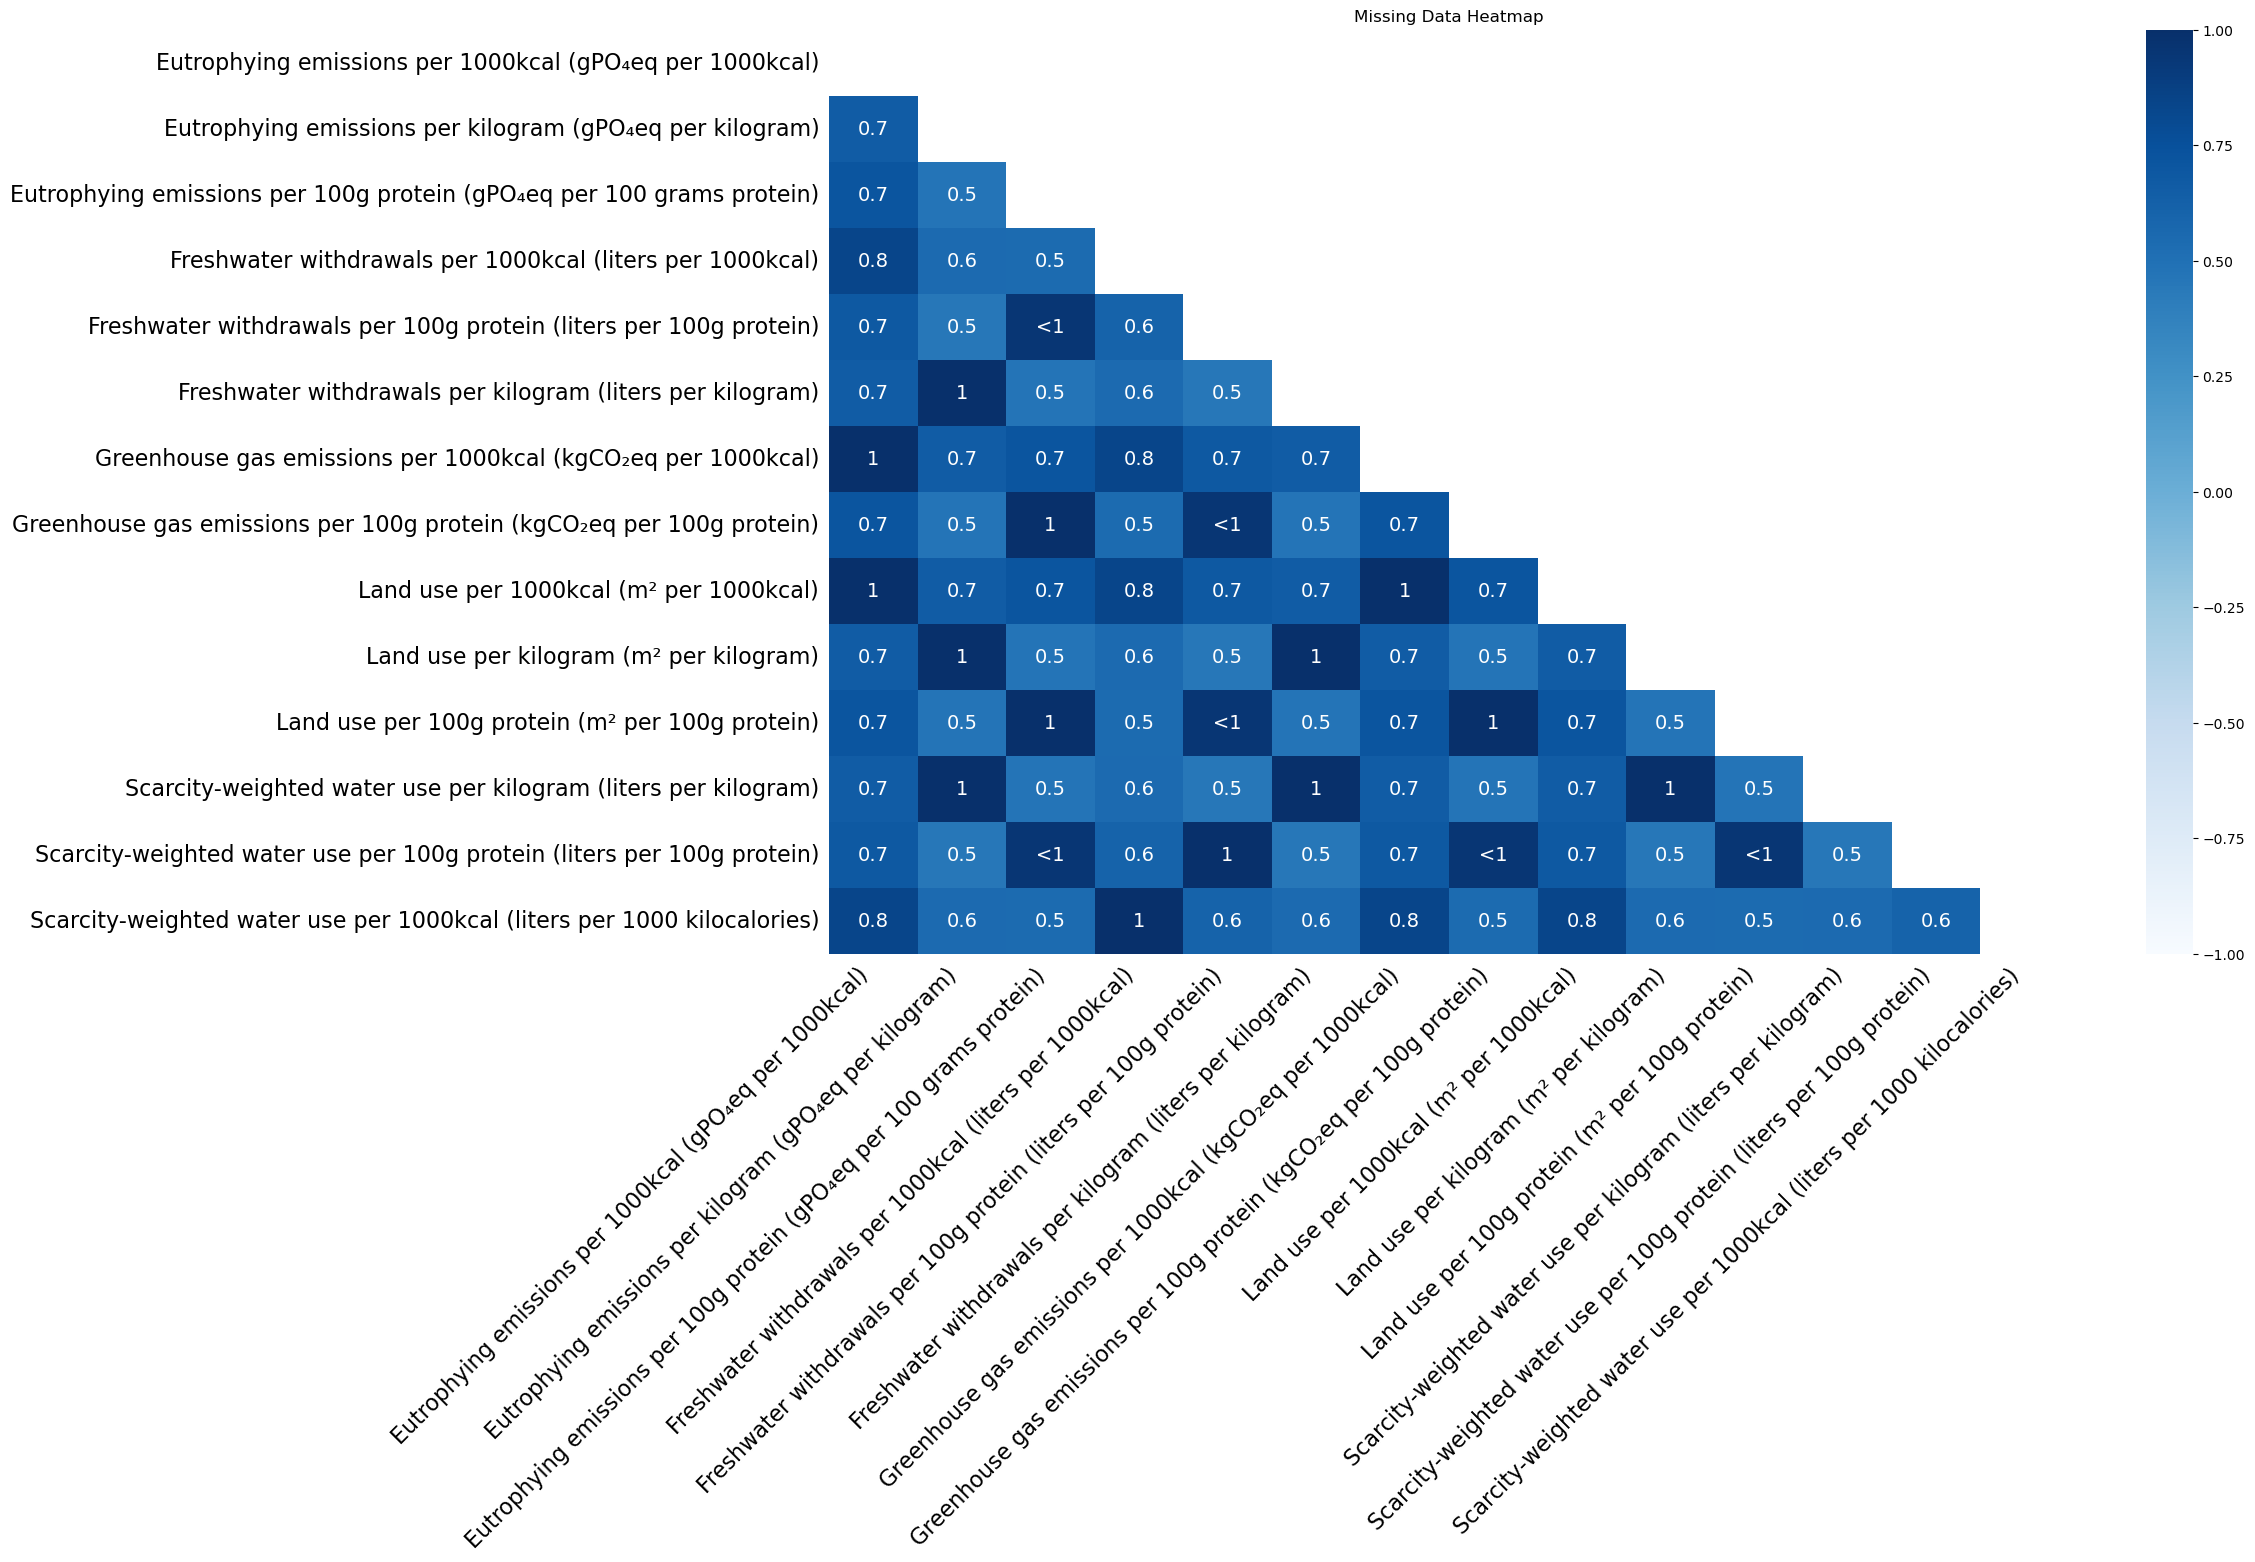

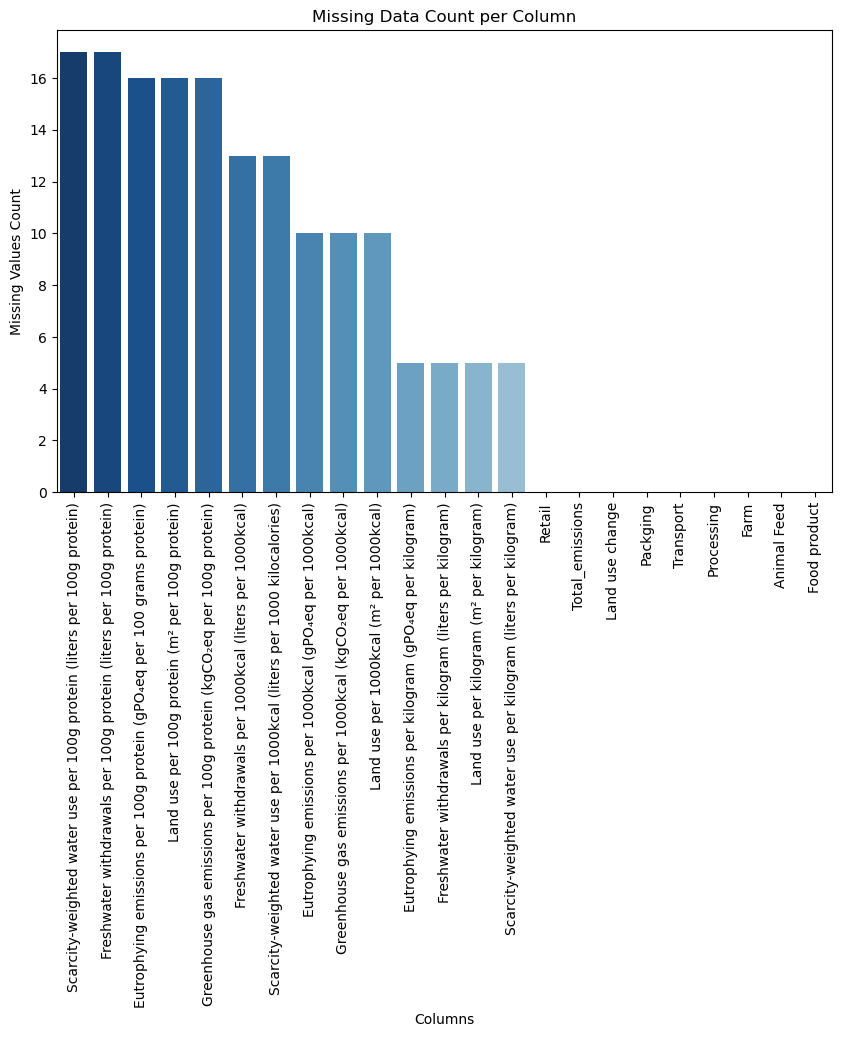

In [25]:
# Investigating if missing values are random and to know how to handle them
# Visualizing missing data as a heatmap
plt.figure(figsize=(10, 6))
msno.heatmap(food_df, cmap="Blues")
plt.title("Missing Data Heatmap")
plt.show()

# Visualizing missing values as a bar plot
plt.figure(figsize=(10, 6))
missing_values = food_df.isnull().sum().sort_values(ascending=False)
sns.barplot(x=missing_values.index, y=missing_values.values, palette="Blues_r")
plt.xticks(rotation=90)
plt.xlabel("Columns")
plt.ylabel("Missing Values Count")
plt.title("Missing Data Count per Column")
plt.show()

#### Observation from barplot and heatmap to check if missing values are random or not

##### * High Missing Value Correlation: 
From the barplot, some variables such as Greenhouse gas emissions per 1000kcal, Land use per 1000kcal, and Scarcity-weighted water use per 1000kcal, have a strong correlation in missing values, meaning if one is missing, others in the same category are likely missing too.

##### * Patterns of Missingness: 
The heatmap suggests that missing values are not random. Instead, specific groups of related variables tend to have similar missing value patterns.

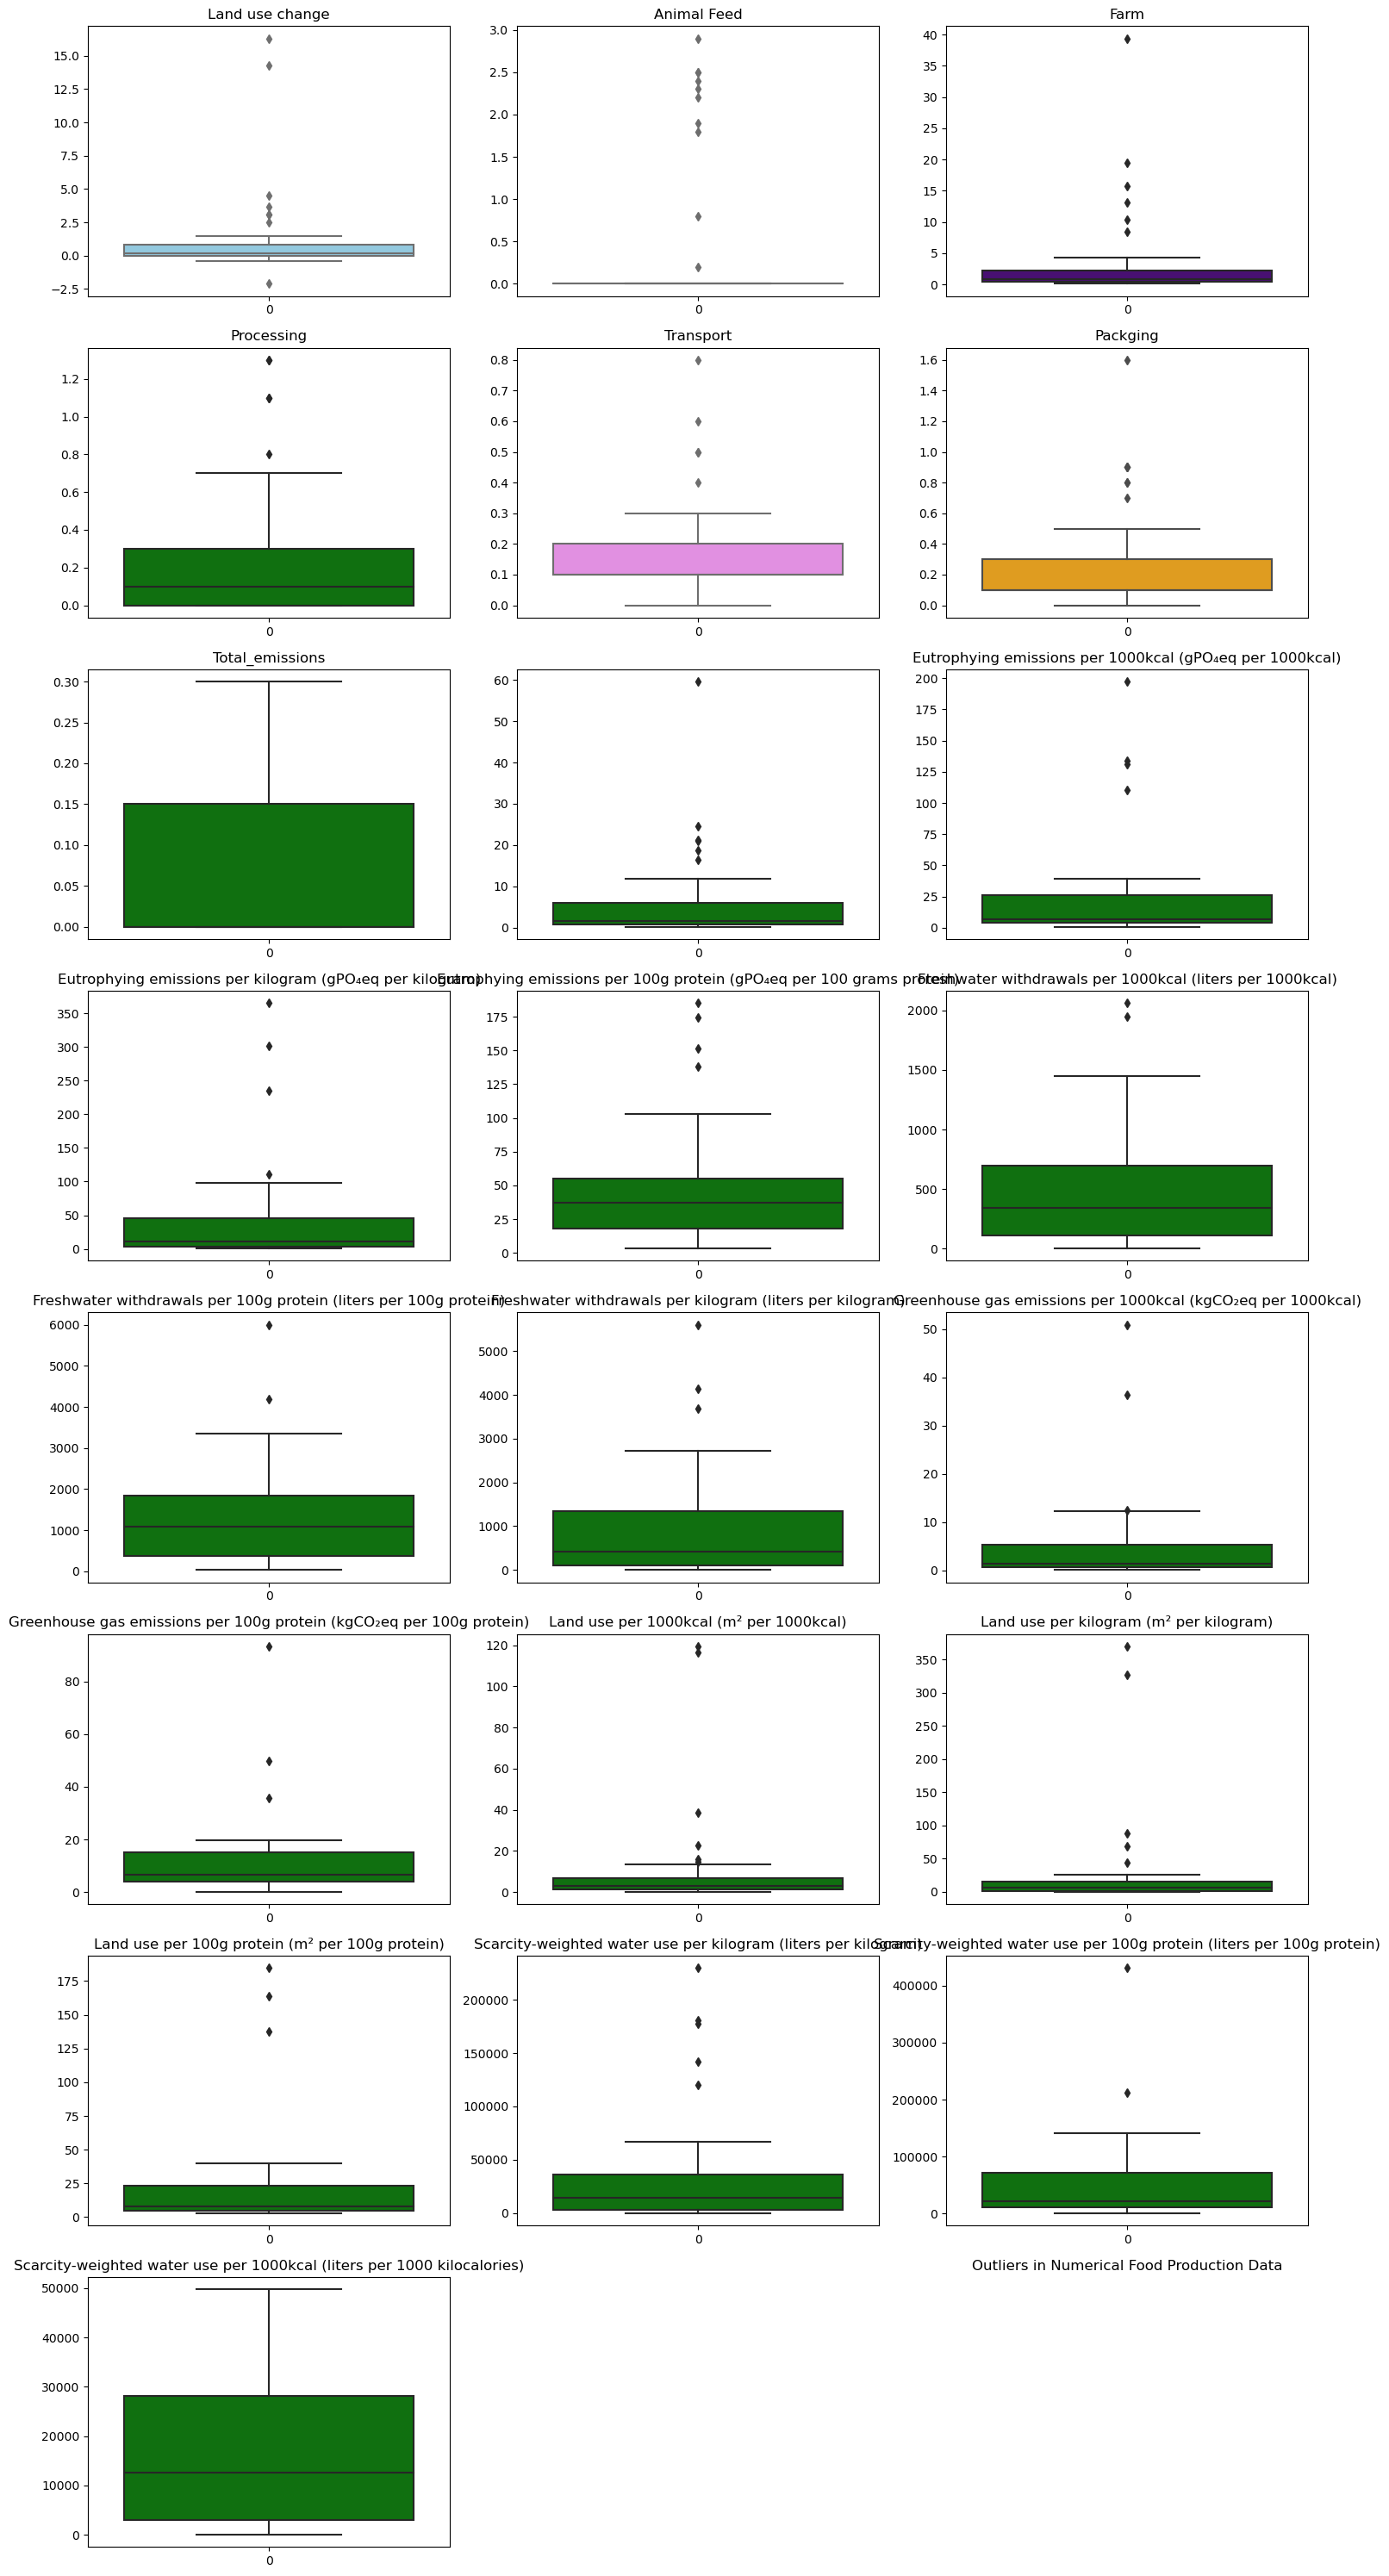

In [16]:
# Checking for outliers
#Checking for outliers in the numerical variables

fig,axes = plt.subplots(nrows=8,ncols=3,figsize=(15,30))
plt.title('Outliers in Numerical Food Production Data')

sns.boxplot(food_df['Land use change'],color='skyblue',ax=axes[0,0])
axes[0,0].set_title('Land use change')

sns.boxplot(food_df['Animal Feed'],color='salmon',ax=axes[0,1])
axes[0,1].set_title('Animal Feed')

sns.boxplot(food_df['Farm'],color='indigo',ax=axes[0,2])
axes[0,2].set_title('Farm')

sns.boxplot(food_df['Processing'],color='green',ax=axes[1,0])
axes[1,0].set_title('Processing')

sns.boxplot(food_df['Transport'],color='violet',ax=axes[1,1])
axes[1,1].set_title('Transport')

sns.boxplot(food_df['Packging'],color='orange',ax=axes[1,2])
axes[1,2].set_title('Packging')

sns.boxplot(food_df["Retail"],color='green', ax=axes[2,0])
axes[2,0].set_title("Retail")

sns.boxplot(food_df["Total_emissions"],color='green', ax=axes[2,1])
axes[2,0].set_title("Total_emissions")

sns.boxplot(food_df["Eutrophying emissions per 1000kcal (gPO₄eq per 1000kcal)"],color='green', ax=axes[2,2])
axes[2,2].set_title("Eutrophying emissions per 1000kcal (gPO₄eq per 1000kcal)")

sns.boxplot(food_df["Eutrophying emissions per kilogram (gPO₄eq per kilogram)"],color='green', ax=axes[3,0])
axes[3,0].set_title("Eutrophying emissions per kilogram (gPO₄eq per kilogram)")

sns.boxplot(food_df["Eutrophying emissions per 100g protein (gPO₄eq per 100 grams protein)"],color='green', ax=axes[3,1])
axes[3,1].set_title("Eutrophying emissions per 100g protein (gPO₄eq per 100 grams protein)")

sns.boxplot(food_df["Freshwater withdrawals per 1000kcal (liters per 1000kcal)"],color='green', ax=axes[3,2])
axes[3,2].set_title("Freshwater withdrawals per 1000kcal (liters per 1000kcal)")

sns.boxplot(food_df["Freshwater withdrawals per 100g protein (liters per 100g protein)"],color='green', ax=axes[4,0])
axes[4,0].set_title("Freshwater withdrawals per 100g protein (liters per 100g protein)")

sns.boxplot(food_df["Freshwater withdrawals per kilogram (liters per kilogram)"],color='green', ax=axes[4,1])
axes[4,1].set_title("Freshwater withdrawals per kilogram (liters per kilogram)")

sns.boxplot(food_df["Greenhouse gas emissions per 1000kcal (kgCO₂eq per 1000kcal)"],color='green', ax=axes[4,2])
axes[4,2].set_title("Greenhouse gas emissions per 1000kcal (kgCO₂eq per 1000kcal)")

sns.boxplot(food_df["Greenhouse gas emissions per 100g protein (kgCO₂eq per 100g protein)"],color='green', ax=axes[5,0])
axes[5,0].set_title("Greenhouse gas emissions per 100g protein (kgCO₂eq per 100g protein)")

sns.boxplot(food_df["Land use per 1000kcal (m² per 1000kcal)"],color='green', ax=axes[5,1])
axes[5,1].set_title("Land use per 1000kcal (m² per 1000kcal)")

sns.boxplot(food_df["Land use per kilogram (m² per kilogram)"],color='green', ax=axes[5,2])
axes[5,2].set_title("Land use per kilogram (m² per kilogram)")

sns.boxplot(food_df["Land use per 100g protein (m² per 100g protein)"],color='green', ax=axes[6,0])
axes[6,0].set_title("Land use per 100g protein (m² per 100g protein)")

sns.boxplot(food_df["Scarcity-weighted water use per kilogram (liters per kilogram)"],color='green', ax=axes[6,1])
axes[6,1].set_title("Scarcity-weighted water use per kilogram (liters per kilogram)")

sns.boxplot(food_df["Scarcity-weighted water use per 100g protein (liters per 100g protein)"],color='green', ax=axes[6,2])
axes[6,2].set_title("Scarcity-weighted water use per 100g protein (liters per 100g protein)")

sns.boxplot(food_df["Scarcity-weighted water use per 1000kcal (liters per 1000 kilocalories)"],color='green', ax=axes[7,0])
axes[7,0].set_title("Scarcity-weighted water use per 1000kcal (liters per 1000 kilocalories)")

axes[7,1].axis('off')
axes[7,1].axis('off')

axes[7,2].axis('off')
axes[7,2].axis('off')


plt.tight_layout()
plt.show()


In [17]:
#Finding the correlation between numerical variables

food_df.select_dtypes("number").corr()

,Land use change,Animal Feed,Farm,Processing,Transport,Packging,Retail,Total_emissions,Eutrophying emissions per 1000kcal (gPO₄eq per 1000kcal),Eutrophying emissions per kilogram (gPO₄eq per kilogram),...,Freshwater withdrawals per 100g protein (liters per 100g protein),Freshwater withdrawals per kilogram (liters per kilogram),Greenhouse gas emissions per 1000kcal (kgCO₂eq per 1000kcal),Greenhouse gas emissions per 100g protein (kgCO₂eq per 100g protein),Land use per 1000kcal (m² per 1000kcal),Land use per kilogram (m² per kilogram),Land use per 100g protein (m² per 100g protein),Scarcity-weighted water use per kilogram (liters per kilogram),Scarcity-weighted water use per 100g protein (liters per 100g protein),Scarcity-weighted water use per 1000kcal (liters per 1000 kilocalories)
Land use change,1.000000,0.243624,0.646480,0.466434,0.052339,0.169467,0.182538,0.801875,0.337867,0.494403,...,-0.148343,0.067124,0.558578,0.859608,0.549123,0.537050,0.711017,-0.080150,-0.205928,-0.174919
Animal Feed,0.243624,1.000000,0.572698,0.426774,0.231742,-0.032542,0.514322,0.574677,0.348723,0.614288,...,-0.130841,0.497170,0.267700,0.053669,0.503087,0.536688,0.357608,0.416657,-0.113964,0.430974
Farm,0.646480,0.572698,1.000000,0.704444,0.233778,0.156483,0.389291,0.969024,0.558132,0.769011,...,-0.110735,0.376208,0.682553,0.439521,0.895024,0.865265,0.746043,0.344633,-0.102506,0.228684
Processing,0.466434,0.426774,0.704444,1.000000,0.338420,0.397291,0.428702,0.719673,0.414108,0.612508,...,-0.164954,0.307651,0.485578,0.376669,0.655071,0.656209,0.678965,0.377084,-0.128816,0.137365
Transport,0.052339,0.231742,0.233778,0.338420,1.000000,0.084875,-0.008222,0.224505,0.004439,0.181761,...,-0.053473,0.040784,0.012476,0.141908,0.234954,0.280545,0.522954,0.198302,-0.051933,-0.022429
Packging,0.169467,-0.032542,0.156483,0.397291,0.084875,1.000000,0.013043,0.205018,0.401668,0.134035,...,-0.230117,-0.044735,0.492838,0.395861,0.128947,0.043706,0.187963,0.054582,-0.196190,-0.271989
Retail,0.182538,0.514322,0.389291,0.428702,-0.008222,0.013043,1.000000,0.391958,0.355667,0.417074,...,-0.009735,0.379763,0.389003,0.113051,0.522435,0.424631,0.363742,0.302882,-0.073145,0.453831
Total_emissions,0.801875,0.574677,0.969024,0.719673,0.224505,0.205018,0.391958,1.000000,0.543278,0.759208,...,-0.143760,0.328886,0.697404,0.599062,0.855761,0.831443,0.791142,0.260914,-0.154060,0.132576
Eutrophying emissions per 1000kcal (gPO₄eq per 1000kcal),0.337867,0.348723,0.558132,0.414108,0.004439,0.401668,0.355667,0.543278,1.000000,0.776863,...,-0.158405,0.228645,0.850787,0.323085,0.426573,0.271549,0.196253,0.045204,-0.196802,0.136325
Eutrophying emissions per kilogram (gPO₄eq per kilogram),0.494403,0.614288,0.769011,0.612508,0.181761,0.134035,0.417074,0.759208,0.776863,1.000000,...,-0.104200,0.499941,0.566214,0.370757,0.531731,0.511844,0.419761,0.317618,-0.154686,0.261908


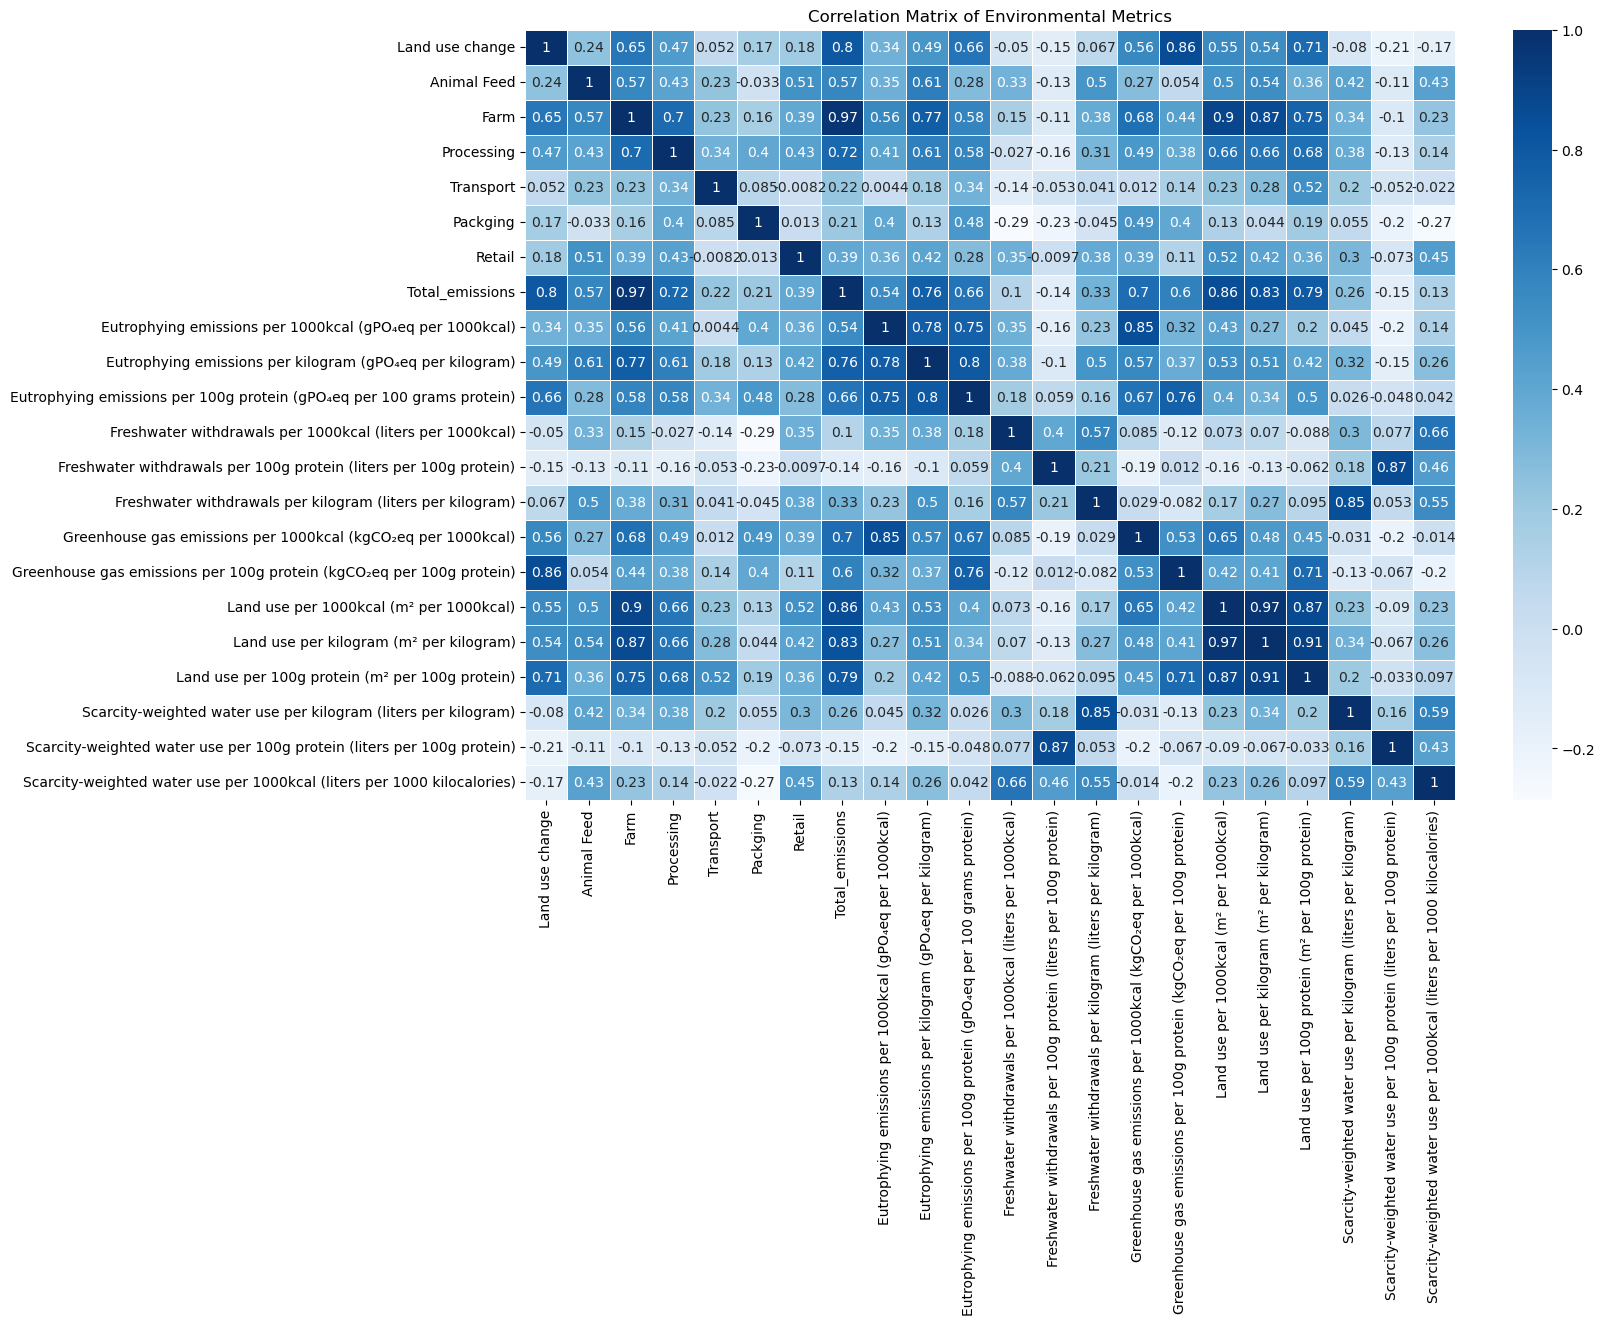

In [21]:
# Create correlation matrix
correlation = food_df.select_dtypes("number").corr()
correlation

# Plot heatmap of `correlation`
plt.figure(figsize = (15,10))
sns.heatmap(correlation,annot = correlation, cmap = 'Blues', linewidths = 0.5)
plt.title('Correlation Matrix of Environmental Metrics')
plt.show()

#### Observation from correlation analysis:

* Strong Positive Correlations:


    * Greenhouse gas emissions per 100g protein and Land use change show a high correlation (~0.86), suggesting that land-intensive food production significantly contributes to emissions.

    * Land use per kilogram strongly correlates with land use per 100g protein (~0.91), reinforcing that land requirements scale with protein content.

    * Total emissions and Farm emissions have a high correlation, indicating farm-level activities as a primary contributor to overall environmental impact.

* Moderate to Weak Correlations:


    * Freshwater withdrawals per kg show weak correlations with greenhouse gas emissions, suggesting water use is not a direct indicator of carbon footprint.

    * Scarcity-weighted water use per kilogram has moderate correlations with land use (~0.59), implying land-intensive crops or livestock may also be water-intensive.

* Negative or Near-Zero Correlations:


    * Transport emissions have very weak correlations with most variables, indicating that production impacts far outweigh transportation in environmental footprint.

    * Eutrophication emissions per kilogram negatively correlate with some land and water use metrics, suggesting that nutrient pollution does not always scale with resource use.

#### Handling missing values: 

#####  * Missing values will be handled based on the following thresholds:

* 0 - 25% Missing → Median Imputation since the data contains outliers, and the median is more robust.

* 25 - 40% Missing → KNN Imputation to preserve relationships between features. 
We use KNN Imputer for columns with moderate missingness (25-40%) because it preserves the underlying relationships in the data

* above 40% Missing → rows will be dropped unless it's critical, as high missingness can introduce bias.

In [28]:
# Define missingness thresholds
drop_threshold = 40  # Drop if >40% missing
knn_threshold = 25   # Use KNN if missingness is between 25-40%
median_threshold = 0 # Use Median if missingness is between 0-25%

# Calculate missingness percentage
missing_percent = food_df.isnull().mean() * 100

# Drop columns exceeding 40% missingness
food_df = food_df.drop(columns=missing_percent[missing_percent > drop_threshold].index)

# Apply median imputation for columns with missingness ≤ 25%
for col in missing_percent[(missing_percent > median_threshold) & (missing_percent <= knn_threshold)].index:
    food_df[col] = food_df[col].fillna(food_df[col].median())

# Apply KNN imputation for columns with missingness between 25% and 40%
knn_imputer = KNNImputer(n_neighbors=5)
knn_cols = missing_percent[(missing_percent > knn_threshold) & (missing_percent <= drop_threshold)].index
food_df[knn_cols] = knn_imputer.fit_transform(food_df[knn_cols])

print("Missing values handled successfully!")


Missing values handled successfully!


In [29]:
food_df.isna().sum()

Food product                                                               0
Land use change                                                            0
Animal Feed                                                                0
Farm                                                                       0
Processing                                                                 0
Transport                                                                  0
Packging                                                                   0
Retail                                                                     0
Total_emissions                                                            0
Eutrophying emissions per 1000kcal (gPO₄eq per 1000kcal)                   0
Eutrophying emissions per kilogram (gPO₄eq per kilogram)                   0
Eutrophying emissions per 100g protein (gPO₄eq per 100 grams protein)      0
Freshwater withdrawals per 1000kcal (liters per 1000kcal)                  0

In [30]:
food_df.head()

,Food product,Land use change,Animal Feed,Farm,Processing,Transport,Packging,Retail,Total_emissions,Eutrophying emissions per 1000kcal (gPO₄eq per 1000kcal),...,Freshwater withdrawals per 100g protein (liters per 100g protein),Freshwater withdrawals per kilogram (liters per kilogram),Greenhouse gas emissions per 1000kcal (kgCO₂eq per 1000kcal),Greenhouse gas emissions per 100g protein (kgCO₂eq per 100g protein),Land use per 1000kcal (m² per 1000kcal),Land use per kilogram (m² per kilogram),Land use per 100g protein (m² per 100g protein),Scarcity-weighted water use per kilogram (liters per kilogram),Scarcity-weighted water use per 100g protein (liters per 100g protein),Scarcity-weighted water use per 1000kcal (liters per 1000 kilocalories)
0,Wheat & Rye (Bread),0.1,0.0,0.8,0.2,0.1,0.1,0.1,1.4,7.000000,...,1437.975324,417.1,1.351351,13.524906,2.976244,6.865,29.105042,14533.05,59196.438503,17380.575408
1,Maize (Meal),0.3,0.0,0.5,0.1,0.1,0.1,0.0,1.1,7.000000,...,1437.975324,417.1,1.351351,13.524906,2.976244,6.865,29.105042,14533.05,59196.438503,17380.575408
2,Barley (Beer),0.0,0.0,0.2,0.1,0.0,0.5,0.3,1.1,7.000000,...,1437.975324,417.1,1.351351,13.524906,2.976244,6.865,29.105042,14533.05,59196.438503,17380.575408
3,Oatmeal,0.0,0.0,1.4,0.0,0.1,0.1,0.0,1.6,4.281357,...,371.076923,482.4,0.945482,1.907692,2.897446,7.600,5.846154,18786.20,14450.923080,7162.104461
4,Rice,0.0,0.0,3.6,0.1,0.1,0.1,0.1,4.0,9.514379,...,3166.760563,2248.4,1.207271,6.267606,0.759631,2.800,3.943662,49576.30,69825.774650,13449.891480


In [31]:
food_df.shape

(43, 23)

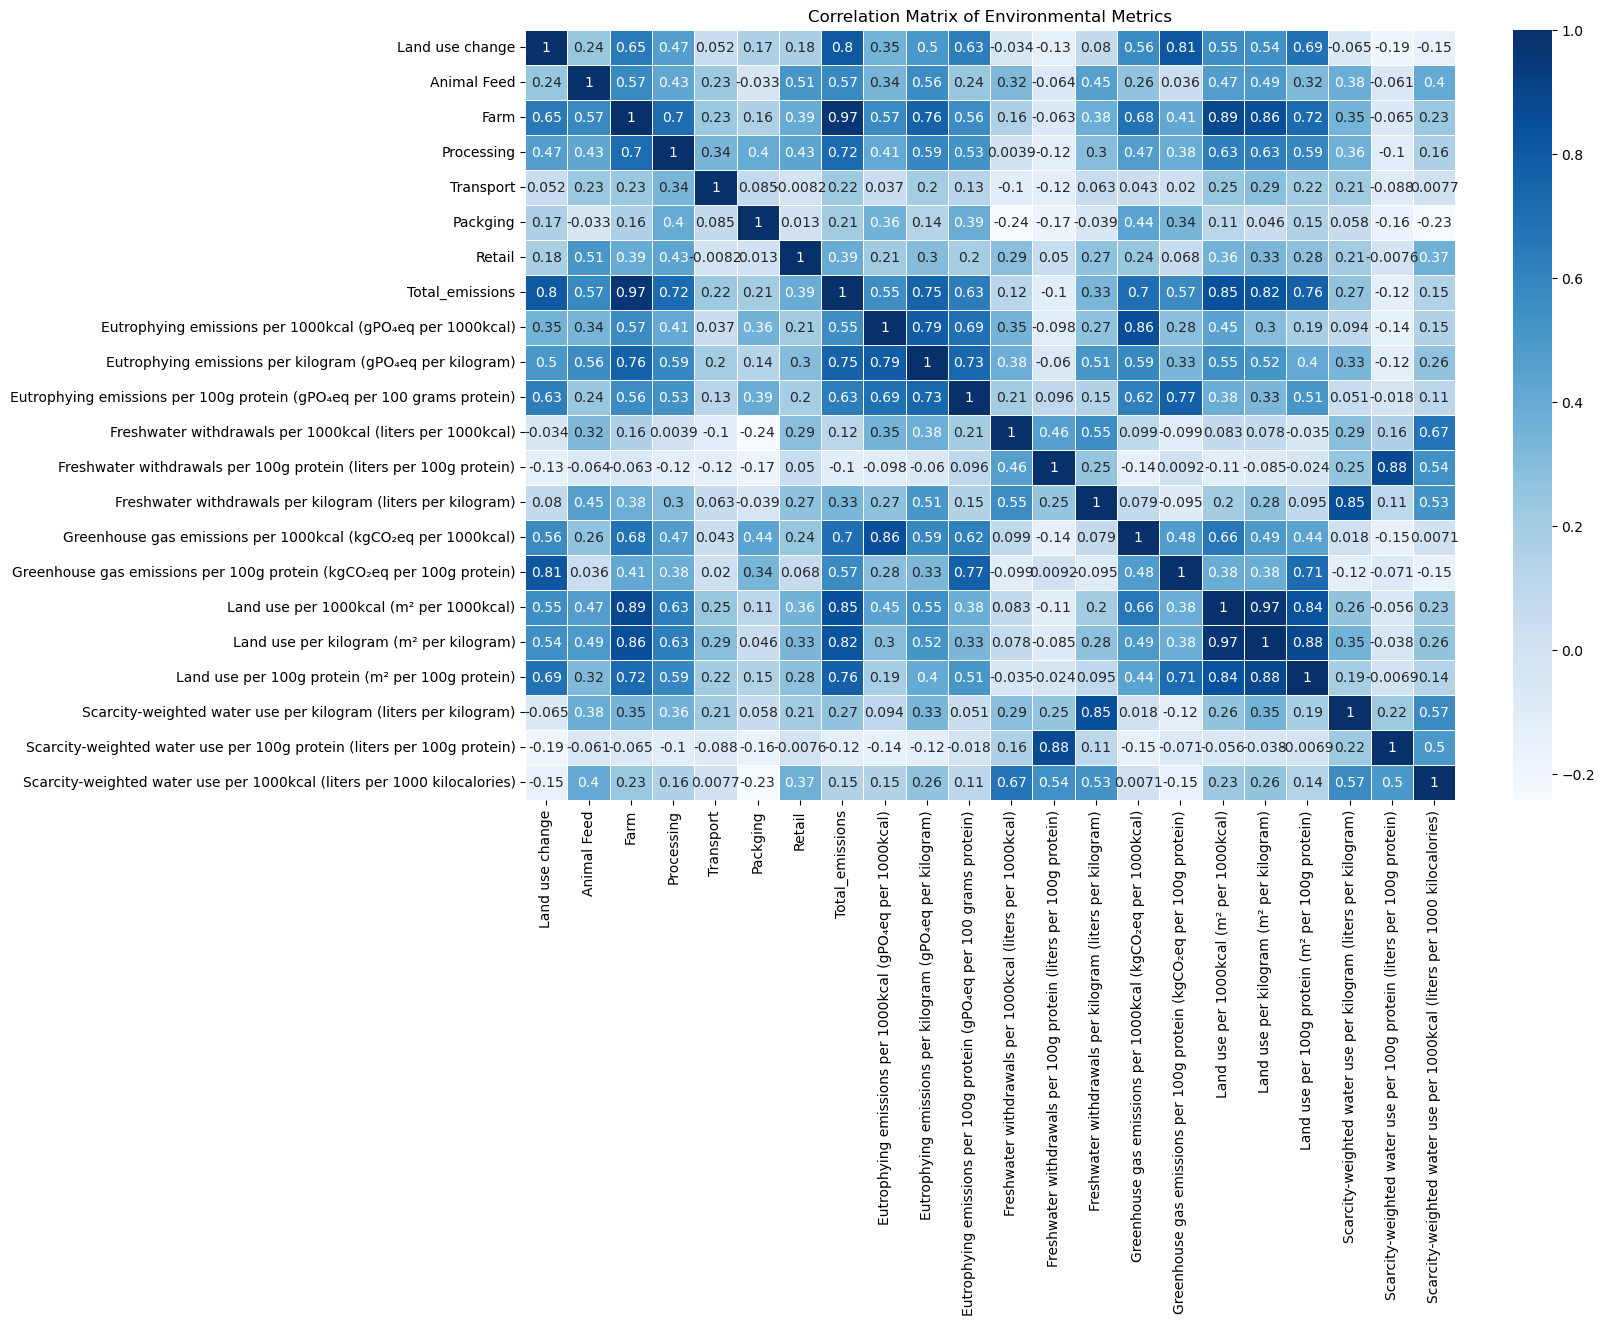

In [32]:
# Create correlation matrix
correlation = food_df.select_dtypes("number").corr()
correlation

# Plot heatmap of `correlation`
plt.figure(figsize = (15,10))
sns.heatmap(correlation,annot = correlation, cmap = 'Blues', linewidths = 0.5)
plt.title('Correlation Matrix of Environmental Metrics')
plt.show()

#### 3.2 Univariate Analysis

Numerical

[Back to Table of content](#Table-of-Content)

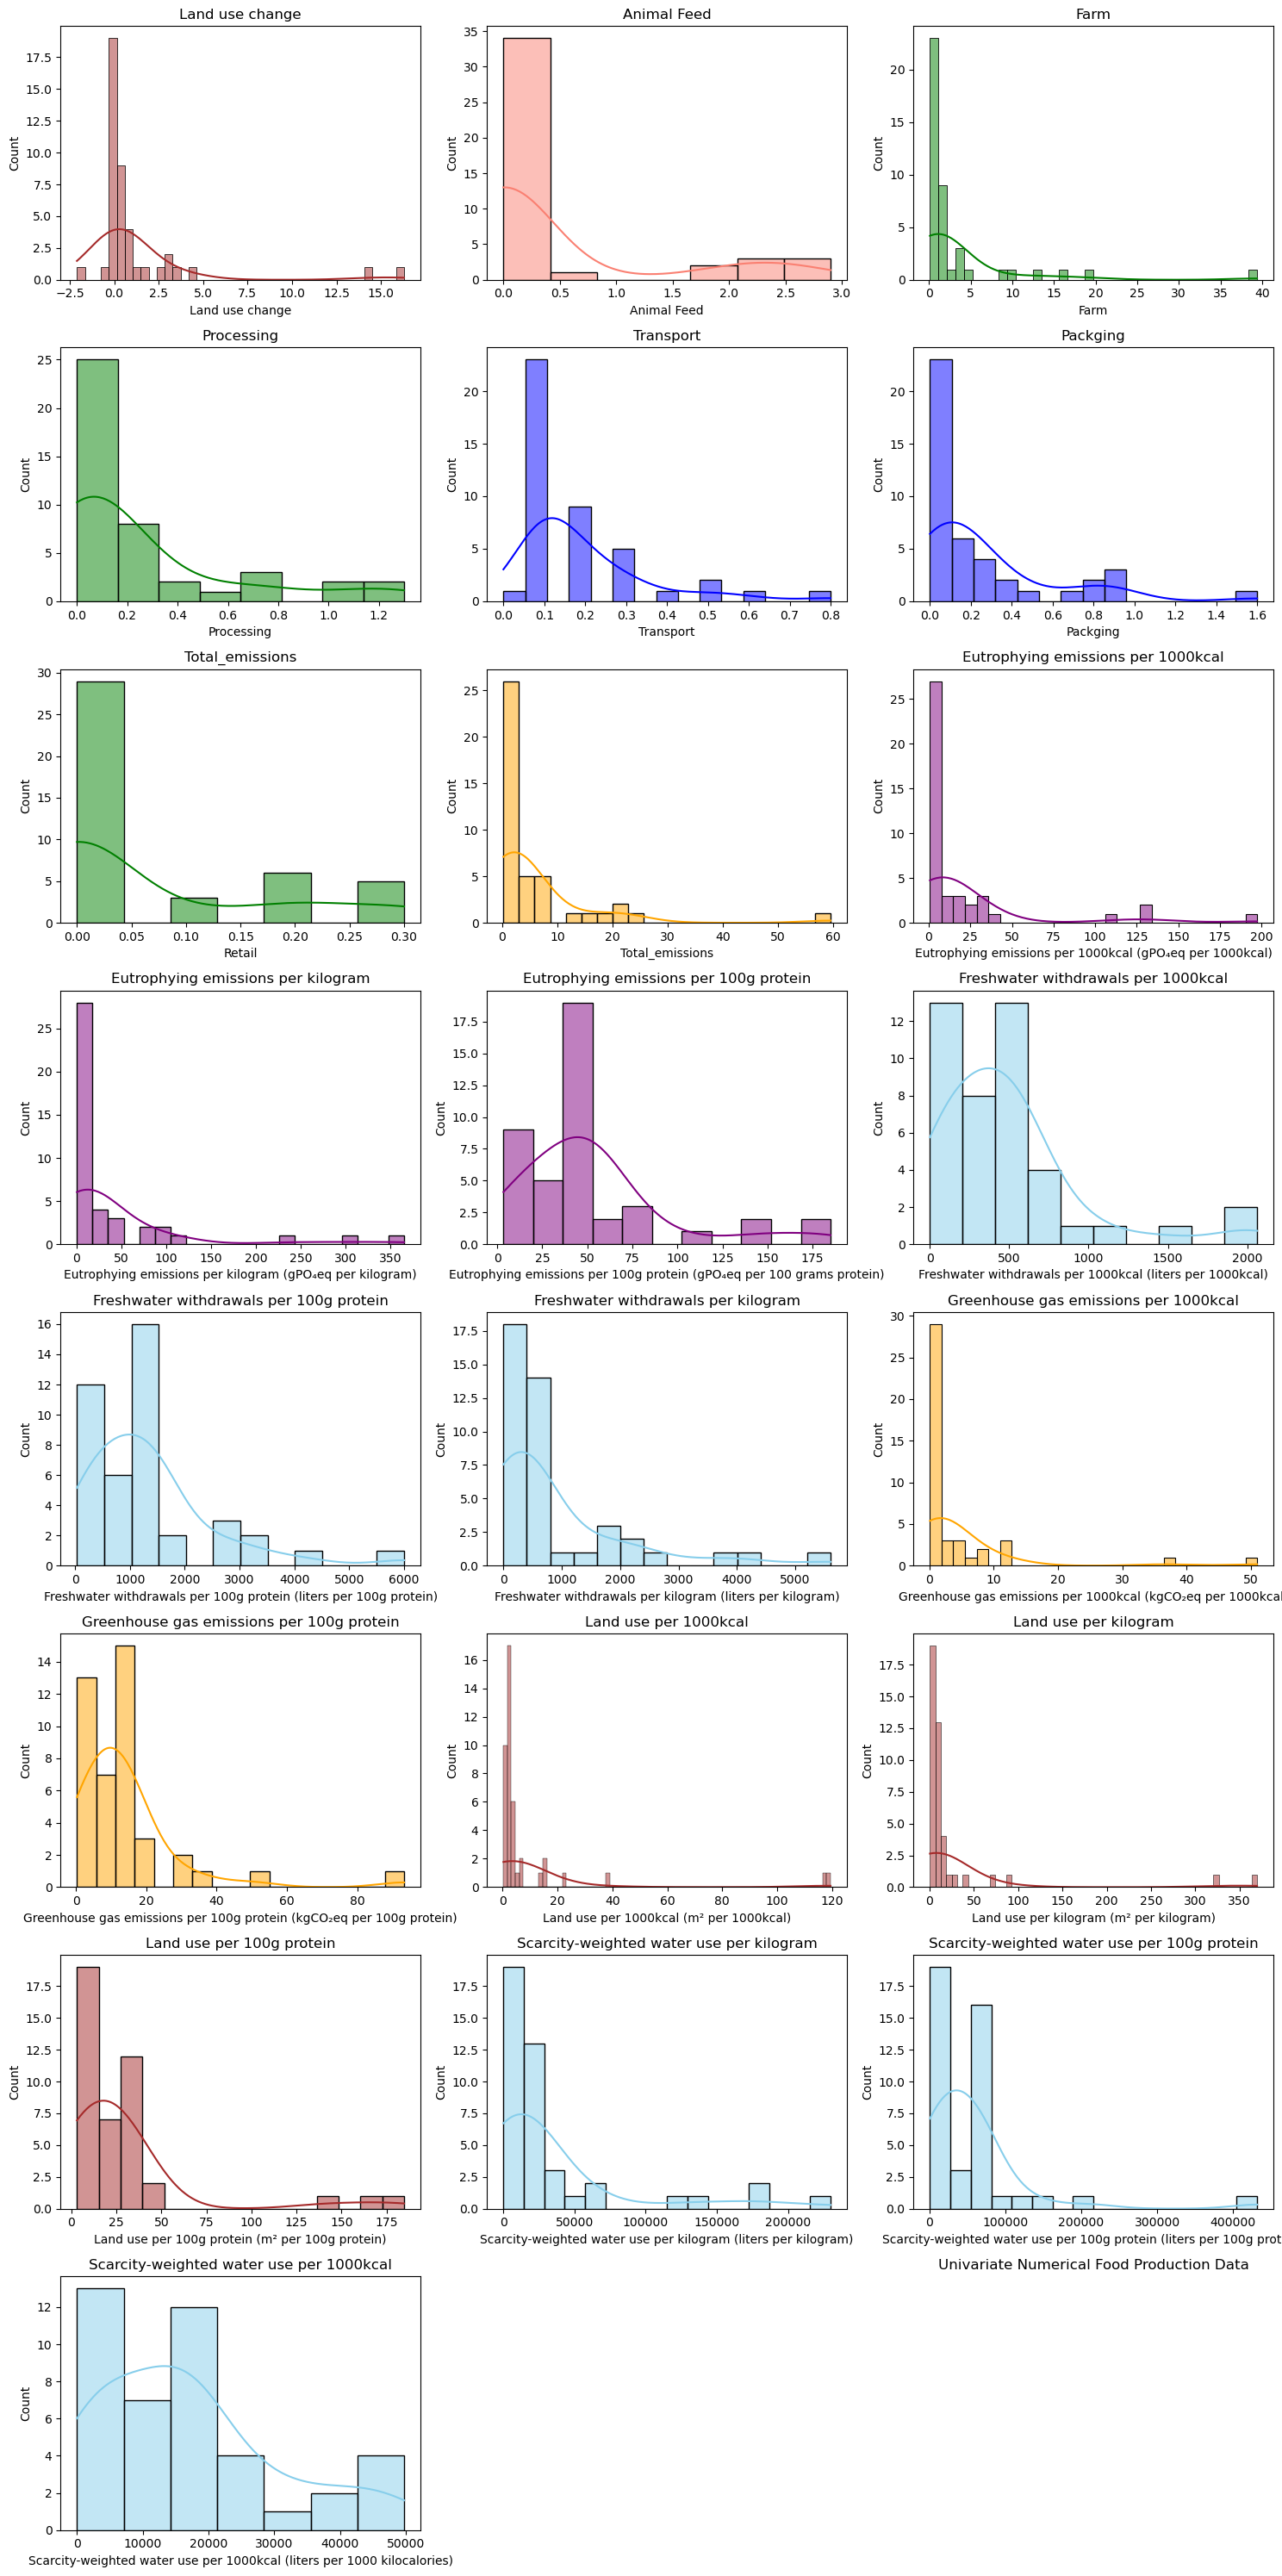

In [44]:
# Checking for outliers
#Checking for outliers in the numerical variables

fig,axes = plt.subplots(nrows=8,ncols=3,figsize=(15,30))
plt.title('Univariate Numerical Food Production Data')

sns.histplot(food_df['Land use change'],kde = True, color='brown',ax=axes[0,0])
axes[0,0].set_title('Land use change')

sns.histplot(food_df['Animal Feed'],kde = True, color='salmon',ax=axes[0,1])
axes[0,1].set_title('Animal Feed')

sns.histplot(food_df['Farm'],color='green',kde=True, ax=axes[0,2])
axes[0,2].set_title('Farm')

sns.histplot(food_df['Processing'],color='green',kde = True, ax=axes[1,0])
axes[1,0].set_title('Processing')

sns.histplot(food_df['Transport'],color='blue',kde=True, ax=axes[1,1])
axes[1,1].set_title('Transport')

sns.histplot(food_df['Packging'],color='blue',kde=True, ax=axes[1,2])
axes[1,2].set_title('Packging')

sns.histplot(food_df["Retail"],color='green', kde=True, ax=axes[2,0])
axes[2,0].set_title("Retail")

sns.histplot(food_df["Total_emissions"],color='orange',kde=True, ax=axes[2,1])
axes[2,0].set_title("Total_emissions")

sns.histplot(food_df["Eutrophying emissions per 1000kcal (gPO₄eq per 1000kcal)"],color='purple', kde=True,ax=axes[2,2])
axes[2,2].set_title("Eutrophying emissions per 1000kcal")

sns.histplot(food_df["Eutrophying emissions per kilogram (gPO₄eq per kilogram)"],color='purple', kde=True,ax=axes[3,0])
axes[3,0].set_title("Eutrophying emissions per kilogram")

sns.histplot(food_df["Eutrophying emissions per 100g protein (gPO₄eq per 100 grams protein)"],color='purple',kde=True, ax=axes[3,1])
axes[3,1].set_title("Eutrophying emissions per 100g protein")

sns.histplot(food_df["Freshwater withdrawals per 1000kcal (liters per 1000kcal)"],color='skyblue',kde=True, ax=axes[3,2])
axes[3,2].set_title("Freshwater withdrawals per 1000kcal")

sns.histplot(food_df["Freshwater withdrawals per 100g protein (liters per 100g protein)"],color='skyblue', kde=-True,ax=axes[4,0])
axes[4,0].set_title("Freshwater withdrawals per 100g protein")

sns.histplot(food_df["Freshwater withdrawals per kilogram (liters per kilogram)"],color='skyblue',kde=True, ax=axes[4,1])
axes[4,1].set_title("Freshwater withdrawals per kilogram")

sns.histplot(food_df["Greenhouse gas emissions per 1000kcal (kgCO₂eq per 1000kcal)"],color='orange',kde=True, ax=axes[4,2])
axes[4,2].set_title("Greenhouse gas emissions per 1000kcal")

sns.histplot(food_df["Greenhouse gas emissions per 100g protein (kgCO₂eq per 100g protein)"],color='orange',kde = True, ax=axes[5,0])
axes[5,0].set_title("Greenhouse gas emissions per 100g protein")

sns.histplot(food_df["Land use per 1000kcal (m² per 1000kcal)"],color='brown',kde=True, ax=axes[5,1])
axes[5,1].set_title("Land use per 1000kcal")

sns.histplot(food_df["Land use per kilogram (m² per kilogram)"],color='brown', kde=True, ax=axes[5,2])
axes[5,2].set_title("Land use per kilogram")

sns.histplot(food_df["Land use per 100g protein (m² per 100g protein)"],color='brown',kde=True, ax=axes[6,0])
axes[6,0].set_title("Land use per 100g protein")

sns.histplot(food_df["Scarcity-weighted water use per kilogram (liters per kilogram)"],color='skyblue', kde=True,ax=axes[6,1])
axes[6,1].set_title("Scarcity-weighted water use per kilogram")

sns.histplot(food_df["Scarcity-weighted water use per 100g protein (liters per 100g protein)"],color='skyblue',kde=True, ax=axes[6,2])
axes[6,2].set_title("Scarcity-weighted water use per 100g protein")

sns.histplot(food_df["Scarcity-weighted water use per 1000kcal (liters per 1000 kilocalories)"],color='skyblue',kde=True, ax=axes[7,0])
axes[7,0].set_title("Scarcity-weighted water use per 1000kcal")

axes[7,1].axis('off')
axes[7,1].axis('off')

axes[7,2].axis('off')
axes[7,2].axis('off')


plt.tight_layout()
plt.show()

Categorical

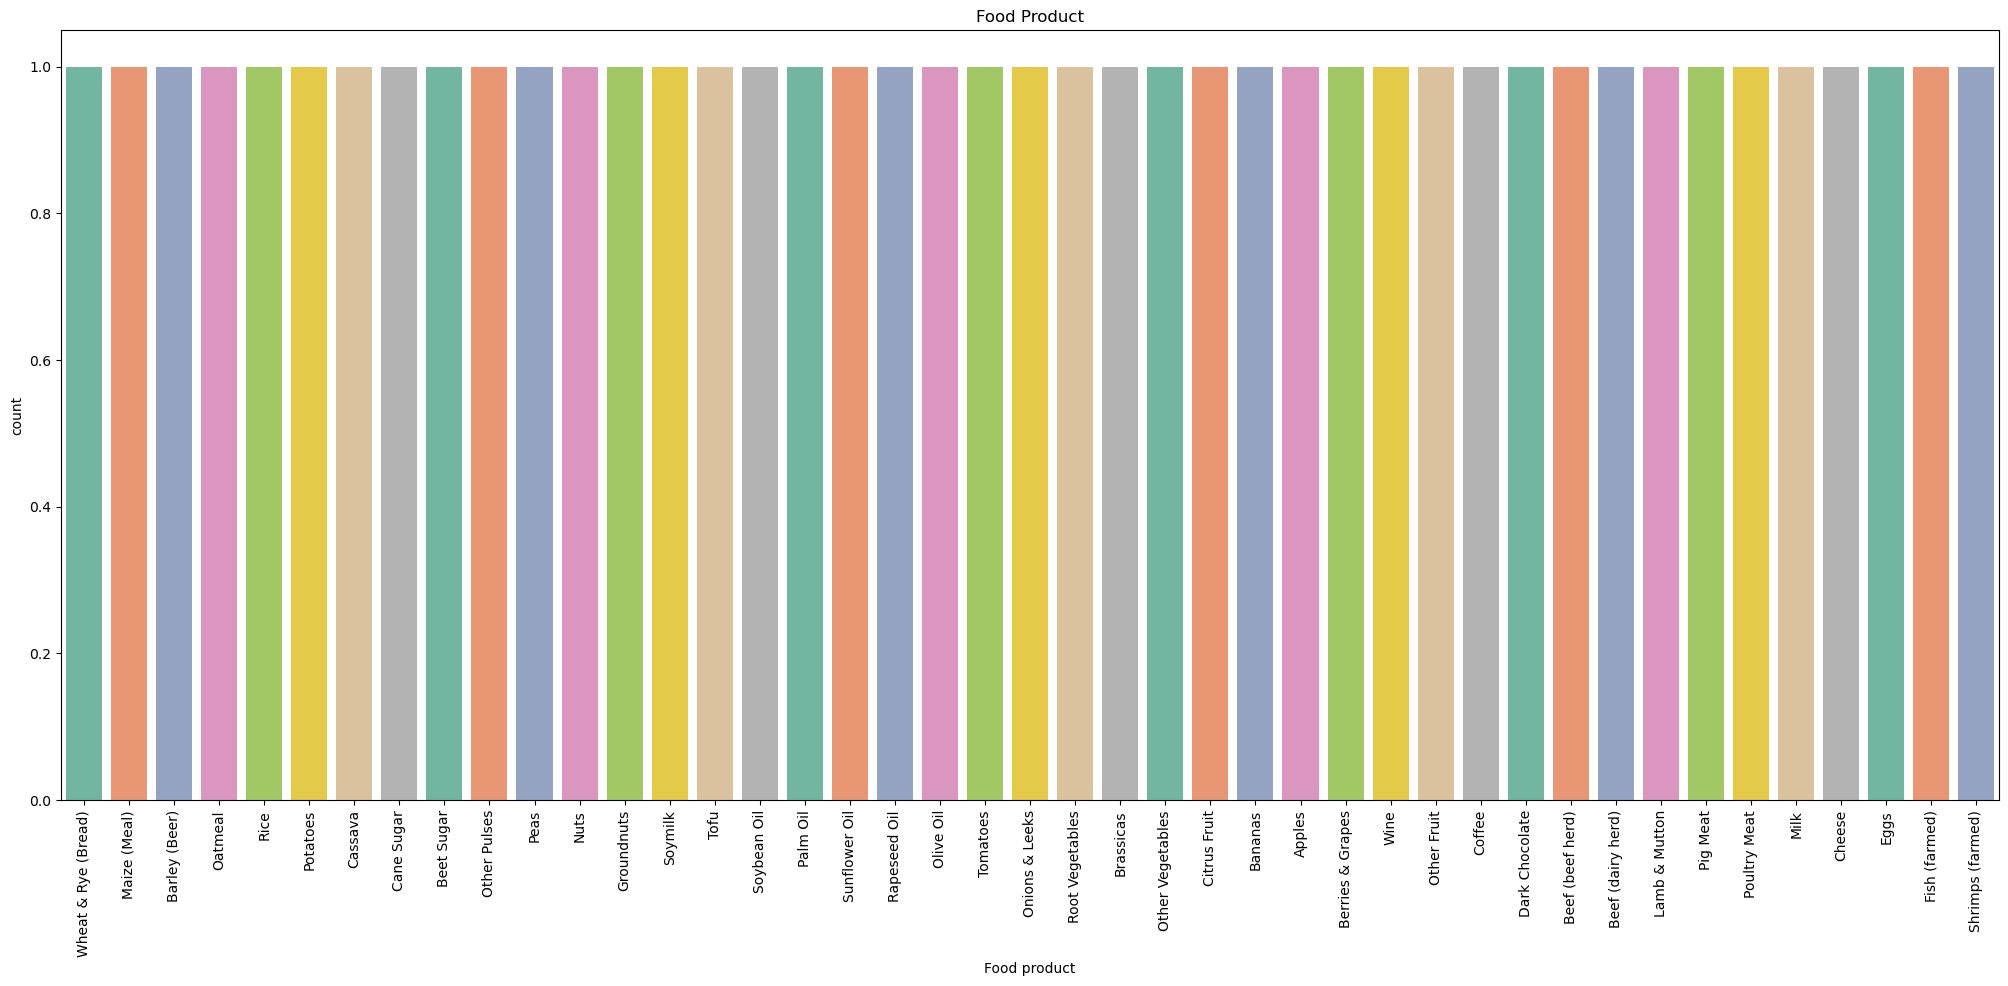

In [52]:
fig, ax = plt.subplots(figsize=(25, 10)) 

sns.countplot(x="Food product", data=food_df, palette= "Set2", ax=ax)
ax.set_title('Food Product')
ax.set_xticklabels(ax.get_xticklabels(), rotation=90)

plt.show()

#### 3.3 Bivariate Analysis

[Back to Table of Content](#Table-of-Content)

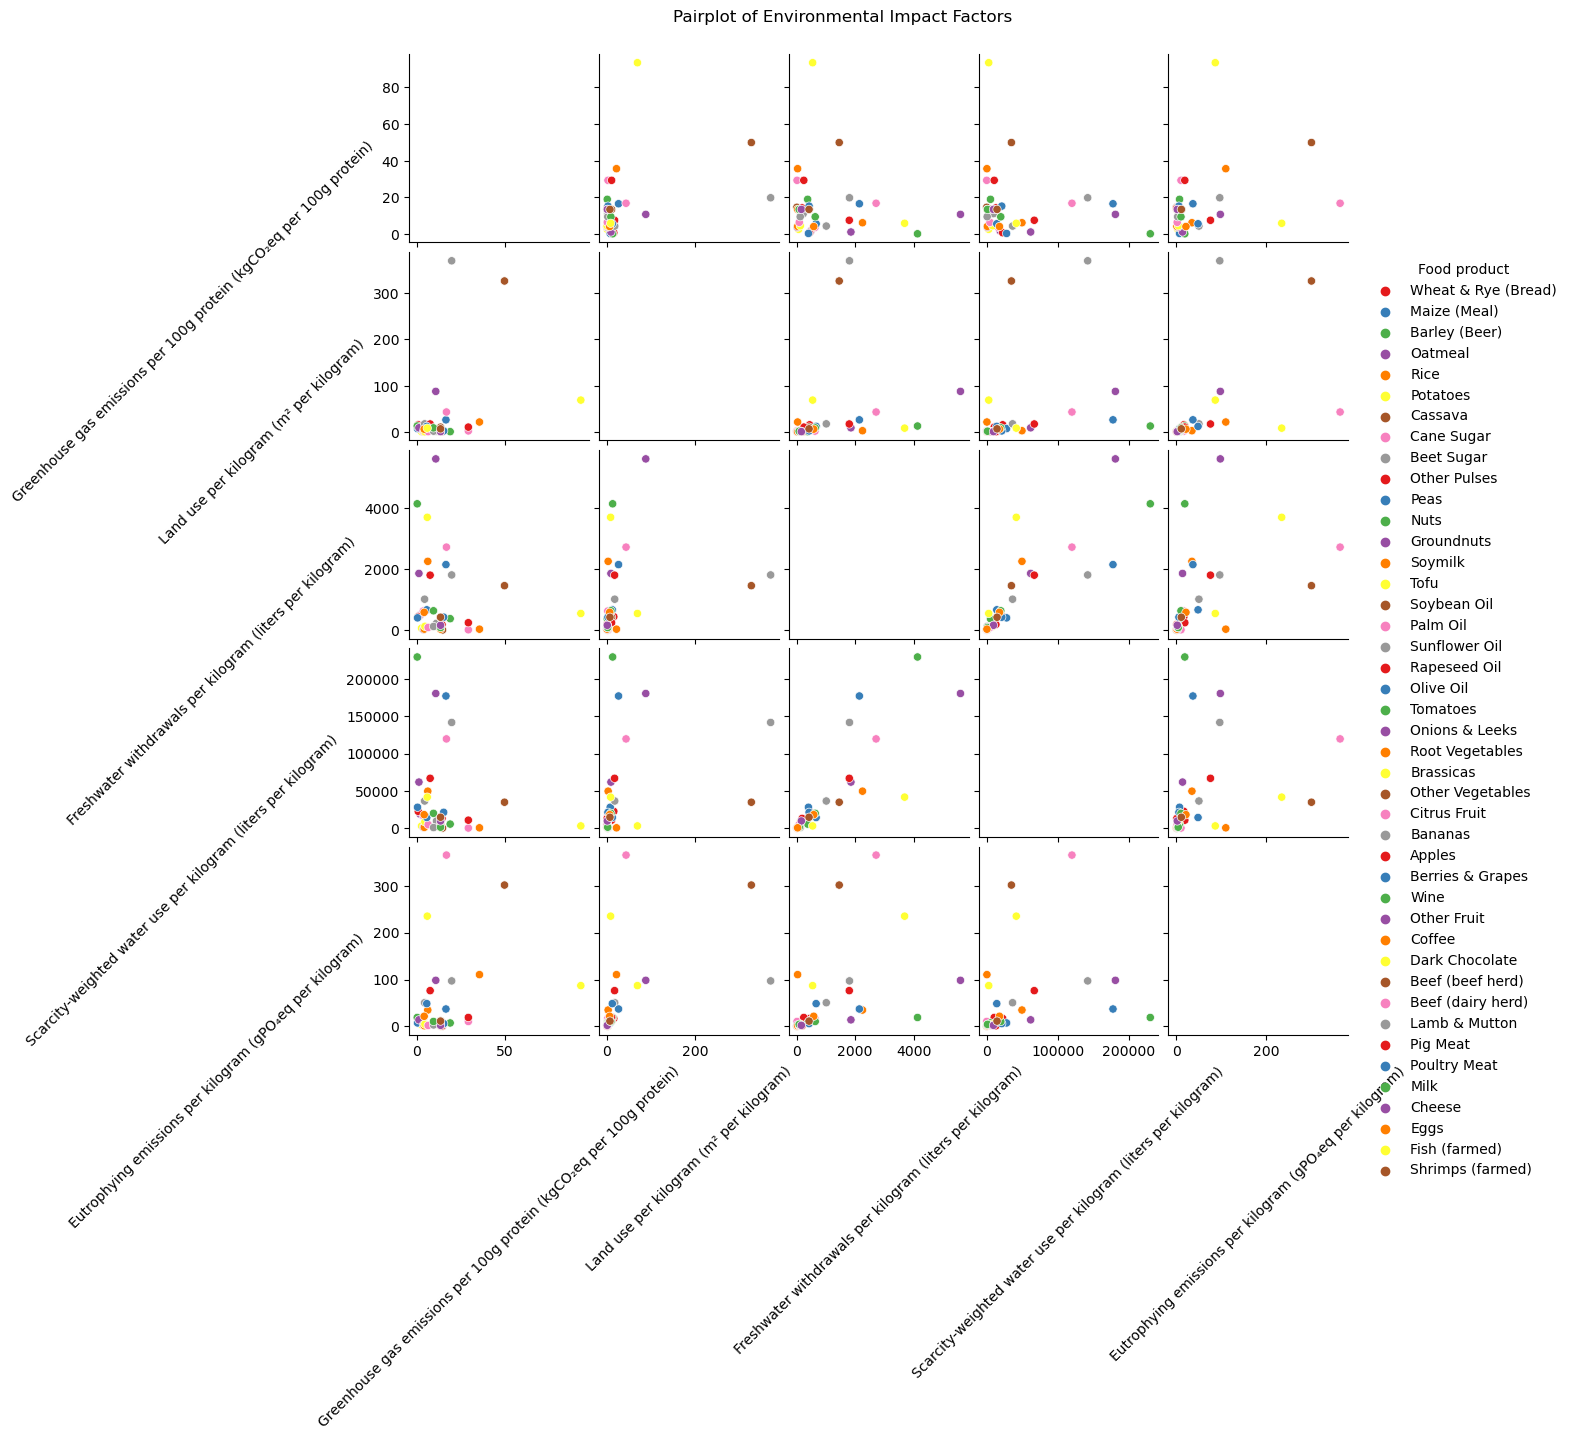

In [57]:
import seaborn as sns
import matplotlib.pyplot as plt

# Selecting relevant environmental impact features
selected_features = [
    'Greenhouse gas emissions per 100g protein (kgCO₂eq per 100g protein)',
    'Land use per kilogram (m² per kilogram)',
    'Freshwater withdrawals per kilogram (liters per kilogram)',
    'Scarcity-weighted water use per kilogram (liters per kilogram)',
    'Eutrophying emissions per kilogram (gPO₄eq per kilogram)',
    'Food product'
]

# Creating the pairplot
sns.pairplot(food_df[selected_features], hue="Food product", diag_kind="kde", palette="Set1")
plt.suptitle("Pairplot of Environmental Impact Factors", y=1.02)
plt.show()
